/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train epoch:  0  batch index:  0 loss:  2.306105613708496
train epoch:  0  batch index:  10 loss:  2.2796971797943115
train epoch:  0  batch index:  20 loss:  2.2390236854553223
train epoch:  0  batch index:  30 loss:  2.19303035736084
train epoch:  0  batch index:  40 loss:  2.1193206310272217
train epoch:  0  batch index:  50 loss:  2.0856289863586426
train epoch:  0  batch index:  60 loss:  2.016845703125
train epoch:  0  batch index:  70 loss:  1.9758780002593994
train epoch:  0  batch index:  80 loss:  1.9488331079483032
train epoch:  0  batch index:  90 loss:  1.8879379034042358
train epoch:  0  batch index:  100 loss:  1.9123847484588623
train epoch:  0  batch index:  110 loss:  1.9026249647140503

test epoch:  0 accuracy:  0.4184

train epoch:  1  batch index:  0 loss:  1.9440258741378784
train epoch:  1  batch index:  10 loss:  1.858983039855957
train epoch:  1  batch index:  20 loss:  1.914764404296875
train epoch:  1  batch index:  30 loss:  1.8693562746047974
train epoch:  

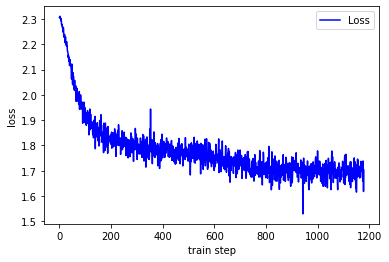

In [7]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt
batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                       train=True, download=True,
                       transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                      train=False, download=True,
                      transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.Layer1 = nn.Linear(28*28, 10)
        # if Dropout:
        #     self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = F.softmax(self.Layer1(x))
        if Dropout:
            # x = self.dropout(x)
            x = F.dropout(x, p=0.5, training=self.training)

        return x


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_SR.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_SR.append(accuracy)
    print('\ntest epoch: ', epoch, 'accuracy: ', accuracy)
    print()


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_SR = []
accuracy_SR = []
Dropout = True
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_SR)

train epoch:  0  batch index:  0 loss:  2.302403211593628
train epoch:  0  batch index:  10 loss:  2.2788705825805664
train epoch:  0  batch index:  20 loss:  2.189082145690918
train epoch:  0  batch index:  30 loss:  1.4739017486572266
train epoch:  0  batch index:  40 loss:  0.7609291672706604
train epoch:  0  batch index:  50 loss:  0.5713207125663757
train epoch:  0  batch index:  60 loss:  0.41590243577957153
train epoch:  0  batch index:  70 loss:  0.3816525340080261
train epoch:  0  batch index:  80 loss:  0.35411545634269714
train epoch:  0  batch index:  90 loss:  0.3043522834777832
train epoch:  0  batch index:  100 loss:  0.25906360149383545
train epoch:  0  batch index:  110 loss:  0.297683984041214
epoch:  0 accuracy:  0.9018
train epoch:  1  batch index:  0 loss:  0.3201237916946411
train epoch:  1  batch index:  10 loss:  0.22713731229305267
train epoch:  1  batch index:  20 loss:  0.22274668514728546
train epoch:  1  batch index:  30 loss:  0.16317066550254822
train epo

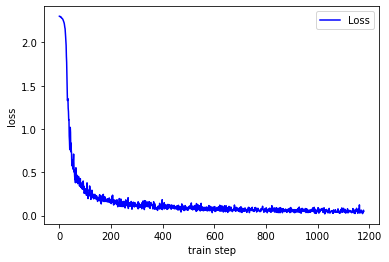

In [8]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = False


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolution layer 1: 1x28x28 -> 16x28x28   kernel size = 3x3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        # convolution layer 1: 16x28x28 -> 32x28x28   kernel size = 3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.layer1 = nn.Linear(32*7*7, 512)
        self.layer2 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2, 2))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size(0), -1)
        x = F.relu(self.layer1(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer2(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_CNN.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        # data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_CNN.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_CNN = []
accuracy_CNN = []
Dropout = True
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_CNN)

train epoch:  0  batch index:  0 loss:  2.303184986114502
train epoch:  0  batch index:  10 loss:  2.207230806350708
train epoch:  0  batch index:  20 loss:  1.9709582328796387
train epoch:  0  batch index:  30 loss:  1.4038039445877075
train epoch:  0  batch index:  40 loss:  0.9714322090148926
train epoch:  0  batch index:  50 loss:  0.7800909876823425
train epoch:  0  batch index:  60 loss:  0.6393795609474182
train epoch:  0  batch index:  70 loss:  0.5355539321899414
train epoch:  0  batch index:  80 loss:  0.5810825228691101
train epoch:  0  batch index:  90 loss:  0.5399408936500549
train epoch:  0  batch index:  100 loss:  0.48024991154670715
train epoch:  0  batch index:  110 loss:  0.40273991227149963
epoch:  0 accuracy:  0.8762
train epoch:  1  batch index:  0 loss:  0.5470234155654907
train epoch:  1  batch index:  10 loss:  0.41127973794937134
train epoch:  1  batch index:  20 loss:  0.4601195454597473
train epoch:  1  batch index:  30 loss:  0.3576759397983551
train epoch

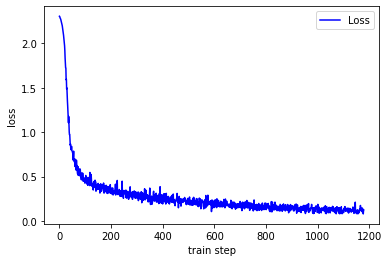

In [9]:
import torch as tr
from torch import nn, optim
from torch.nn import functional as F
import torchvision
import matplotlib.pyplot as plt

batch_size = 512

train_datasets = torchvision.datasets.MNIST(root='mnist_data',
                                            train=True, download=True,
                                            transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='mnist_data',
                                          train=False, download=True,
                                          transform=torchvision.transforms.ToTensor())

train_loader = tr.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)
test_loader = tr.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Dropout = True


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(28*28, 512)
        self.layer2 = nn.Linear(512, 512)
        self.layer3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        if Dropout:
            x = F.dropout(x, p=0.5, training=self.training)

        return self.layer3(x)


def train_model(epoch):
    for idx, (data, target) in enumerate(train_loader):
        # the form of x and y
        # 0  :  torch.Size([512, 1, 28, 28]) 512
        # 1  :  torch.Size([512, 1, 28, 28]) 512
        # 2  :  torch.Size([512, 1, 28, 28]) 512

        # flatten the input data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(data.size(0), 28*28)
        out = net(data)

        loss = F.cross_entropy(out, target)
        # loss = F.nll_loss(out, target)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_collect_MLP.append(loss.item())

        if idx % 10 == 0:
            print('train epoch: ', epoch, ' batch index: ', idx, 'loss: ', loss.item())


def test_accuracy(epoch):
    total_correct = 0
    for idx, (data, target) in enumerate(test_loader):
        data = data.view(data.size(0), 28*28)
        out = net(data)

        pred = out.argmax(dim=1)
        correct = pred.eq(target).sum().float().item()
        total_correct += correct

    accuracy = total_correct / (len(test_loader.dataset))
    accuracy_MLP.append(accuracy)
    print('epoch: ', epoch, 'accuracy: ', accuracy)


def plot_loss(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['Loss'], loc='upper right')
    plt.xlabel('train step')
    plt.ylabel('loss')
    plt.show()


net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.5)
loss_collect_MLP = []
accuracy_MLP = []
Dropout = True
for epoch in range(10):
    train_model(epoch)
    test_accuracy(epoch)

plot_loss(loss_collect_MLP)

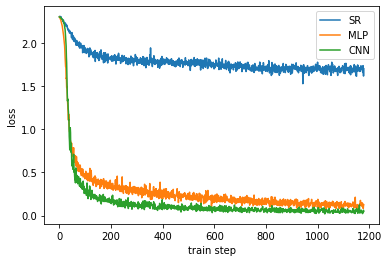

In [10]:
plt.plot(range(len(loss_collect_SR)), loss_collect_SR, label="SR")
plt.legend()
plt.plot(range(len(loss_collect_MLP)), loss_collect_MLP, label="MLP")
plt.legend()
plt.plot(range(len(loss_collect_CNN)), loss_collect_CNN, label="CNN")
plt.legend()
plt.xlabel("train step")
plt.ylabel("loss")
plt.show()

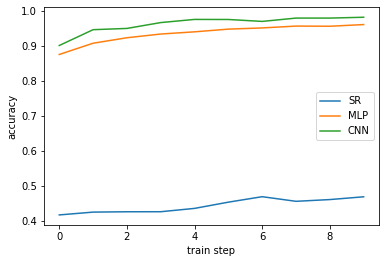

In [11]:
plt.plot(range(len(accuracy_SR)), accuracy_SR, label="SR")
plt.legend()
plt.plot(range(len(accuracy_MLP)), accuracy_MLP, label="MLP")
plt.legend()
plt.plot(range(len(accuracy_CNN)), accuracy_CNN, label="CNN")
plt.legend()
plt.xlabel("train step")
plt.ylabel("accuracy")
plt.show()